In [104]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [105]:
path = "england_empire.txt"
text = open(path).read().lower()
print('corpus length: ', len(text))

corpus length:  52258


In [106]:
print(text)

the
constitution
oftheunitedstates
national constitution center
c o n s t i t u t i o n o f t h e u n i t e d s t a t e s
we the people of the united states, in order to form a
more perfect union, establish justice, insure domestic
tranquility, provide for the common defence, promote
the general welfare, and secure the blessings of liberty to
ourselves and our posterity, do ordain and establish this
constitution for the united states of america.
article.i.
section. 1.
all legislative powers herein granted shall be vested in a
congress of the united states, which shall consist of a senate and house of representatives.
section. 2.
the house of representatives shall be composed of members chosen every second year by the people of the several
states, and the electors in each state shall have the qualifi -
cations requisite for electors of the most numerous branch
of the state legislature.
no person shall be a representative who shall not have
attained to the age of twenty fi ve years,

In [107]:
tokenizer = RegexpTokenizer(r'w+')
words = tokenizer.tokenize(text)
words

['w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w',
 'w'

In [108]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))
unique_word_index

{'w': 0, 'www': 1}

In [109]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])

print(prev_words[0])
print(next_words[0])

['w', 'w', 'w', 'w', 'w']
w


In [110]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
             
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]]    = 1





In [111]:
print(X[0][0])

[ True False]


In [112]:
model = Sequential()
model.add(LSTM(128, input_shape = (WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [113]:
optimizer = RMSprop(lr= 0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

Epoch 1/2


c:\Users\TOSHIBA\anaconda3\envs\pythonProject\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 8s 866ms/step - loss: 0.2359 - accuracy: 1.0000 - val_loss: 0.6287 - val_accuracy: 0.9524
Epoch 2/2
3/3 [==============================] - 0s 51ms/step - loss: 1.7881e-06 - accuracy: 1.0000 - val_loss: 0.6289 - val_accuracy: 0.9524


In [114]:
model.save('next_word.h5')
pickle.dump(history, open("history.p", "wb"))
model= load_model("next_word.h5")
history = pickle.load(open("history.p", "rb"))

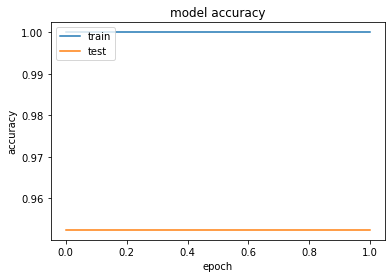

In [115]:
plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc= "upper left")

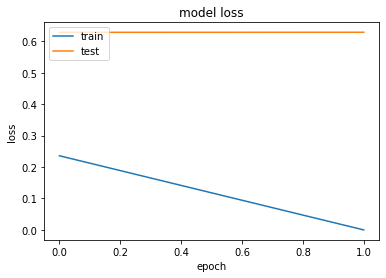

In [116]:
plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc= "upper left")

In [117]:
def prepare_input(text):
    X = np.zeros((1, SEQUENCE_LENGTH, len(chars)))
    for t, char in enumerate(text):
        X[0, t, char_indices[char]] = 1.

    return X

In [119]:
prepare_input("This is an example of input for our LSTM".lower())

NameError: name 'SEQUENCE_LENGTH' is not defined

In [ ]:
def prepare_input(text):
    X = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        X[0, t, unique_word_index[word]] = 1

    return X
prepare_input("more Perfect union".lower())

more


KeyError: 'more'

In [ ]:
def sampple(preds, top_n = 3):
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [ ]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        X = prepare_input(text)
        preds = model.predict(X, verbose=0)[0]
        next_index = sampple(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char

        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [ ]:
def predict_completion(text, n = 3):
    X = prepare_input(text)
    preds = model.predict(X, verbose=0)[0]
    next_indices = sampple(preds, n)
    return [indices_char[idx] + predict_completion(text[1: ] + indices_char[idx]) for idx in next_indices]

In [ ]:
quotes = ["It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [ ]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completion(seq, 5))
    print()

it is not a lack of love, but a lack of 
it


KeyError: 'it'